In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [2]:
df=pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df=pd.DataFrame(df)

In [3]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [4]:
df.shape

(1470, 35)

We have data set of dimension  1470 rows and 35 columns.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In above data set we have Object as well as integer data type.

In [6]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In this data set we do not have null values present.

In [7]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Here we get the detail information of the mean, standard deviation, minimum and maximum values present in data set.

We also get rough idean if any outliers present in data set by comparing the 50% and mean rows.

Here we are having only 26 columns amongst 35 columns, this is due the reason that the other 9 columns have string or object type of data that we will have to convert in integer data further.

In [8]:
df['Over18'].value_counts()

Y    1470
Name: Over18, dtype: int64

In [9]:
df['StandardHours'].value_counts()

80    1470
Name: StandardHours, dtype: int64

In [10]:
df['BusinessTravel'].value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

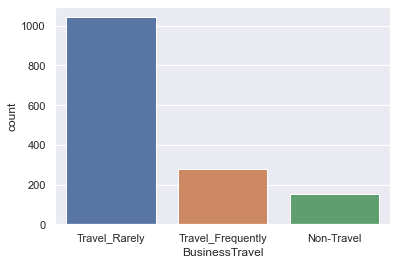

In [11]:
sns.countplot(x = "BusinessTravel", data = df)

In [12]:
df['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

<AxesSubplot:xlabel='Department', ylabel='count'>

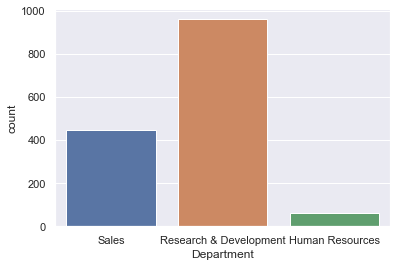

In [13]:
sns.countplot(x = "Department", data = df)

In [14]:
df['EducationField'].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

<AxesSubplot:xlabel='count', ylabel='EducationField'>

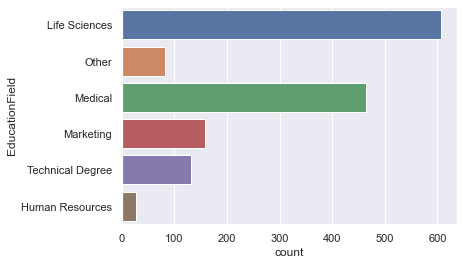

In [15]:
sns.countplot(y = "EducationField", data = df)      # these are various Eductaional Fields to where the people belong

In [16]:
df['Gender'].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

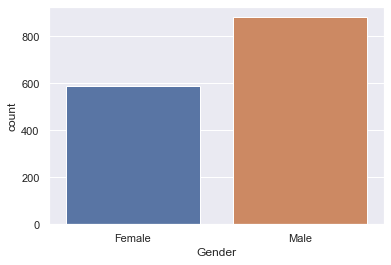

In [17]:
sns.countplot(x = "Gender", data = df)     # 882 are Male employes and 588 are Female employees

In [18]:
df['JobRole'].value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

<AxesSubplot:xlabel='count', ylabel='JobRole'>

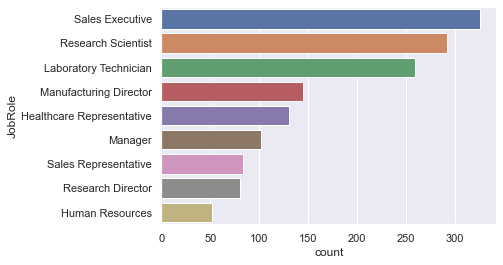

In [19]:
sns.countplot(y = "JobRole", data = df)

In [20]:
df['MaritalStatus'].value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

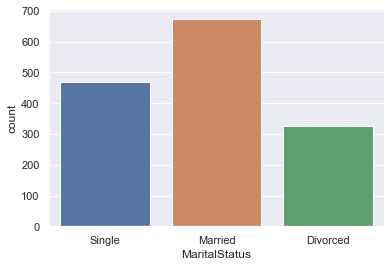

In [21]:
sns.countplot(x = "MaritalStatus", data = df)       # 673 are married, 470 are singles and 327 are Divorced

In [22]:
df['OverTime'].value_counts()

No     1054
Yes     416
Name: OverTime, dtype: int64

<AxesSubplot:xlabel='OverTime', ylabel='count'>

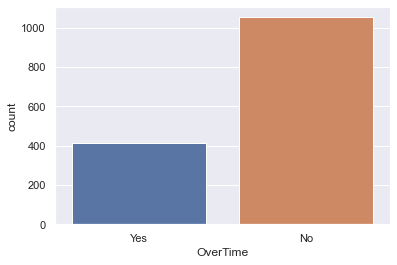

In [23]:
sns.countplot(x = "OverTime", data = df)        # 1054 people don't do Over time while 416 people do Overtime

W can understand the data set by the count and Bar plots above.

Over18 and StandardHours are having single vaules of Y and 80 respectively through out the column hence we can drop these column fruther as they will not have any impact on the target.

We have droped the Over18 column as it had repetative values through out the column.

In [24]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


# EDA   

In [25]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

df['Attrition']=LE.fit_transform(df['Attrition'])
df




,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [26]:
df['BusinessTravel']=LE.fit_transform(df['BusinessTravel'])

In [27]:
df['Department']=LE.fit_transform(df['Department'])

In [28]:
df['EducationField']=LE.fit_transform(df['EducationField'])

In [29]:
df['Gender']=LE.fit_transform(df['Gender'])

In [30]:
df['MaritalStatus']=LE.fit_transform(df['MaritalStatus'])

In [31]:
df['OverTime']=LE.fit_transform(df['OverTime'])

In [32]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,1,2065,...,4,80,0,17,3,2,9,6,0,8


Age                            AxesSubplot(0.125,0.536818;0.036215x0.343182)
Attrition                   AxesSubplot(0.168458,0.536818;0.036215x0.343182)
BusinessTravel              AxesSubplot(0.211916,0.536818;0.036215x0.343182)
DailyRate                   AxesSubplot(0.255374,0.536818;0.036215x0.343182)
Department                  AxesSubplot(0.298832,0.536818;0.036215x0.343182)
DistanceFromHome             AxesSubplot(0.34229,0.536818;0.036215x0.343182)
Education                   AxesSubplot(0.385748,0.536818;0.036215x0.343182)
EducationField              AxesSubplot(0.429206,0.536818;0.036215x0.343182)
EmployeeCount               AxesSubplot(0.472664,0.536818;0.036215x0.343182)
EmployeeNumber              AxesSubplot(0.516121,0.536818;0.036215x0.343182)
EnvironmentSatisfaction     AxesSubplot(0.559579,0.536818;0.036215x0.343182)
Gender                      AxesSubplot(0.603037,0.536818;0.036215x0.343182)
HourlyRate                  AxesSubplot(0.646495,0.536818;0.036215x0.343182)

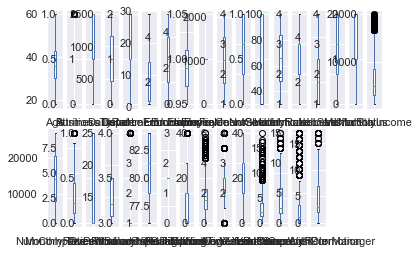

In [33]:

df.plot(kind='box',subplots=True, layout=(2,18))

We coul see there are outliers in MonthlyIncome, YearsWithCurrManager, YearsSinceLastPromotion, YearsInCurrentRole,
YearsAtCompany, TrainingTimesLastYear, TotalWorkingYears, StockOptionLevel, PerformanceRating and NumCompaniesWorked.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MonthlyIncome'>

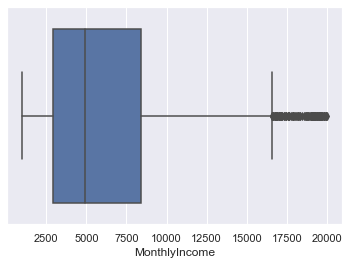

In [34]:
sns.boxplot('MonthlyIncome',data=df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='YearsWithCurrManager'>

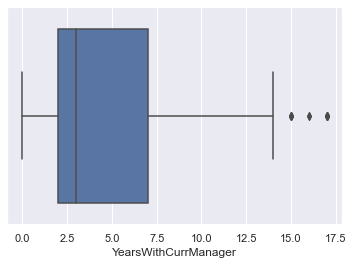

In [35]:
sns.boxplot('YearsWithCurrManager',data=df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='YearsSinceLastPromotion'>

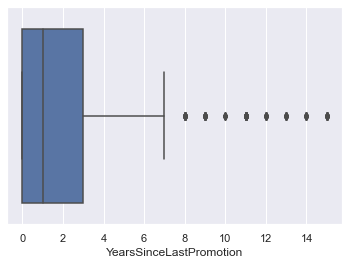

In [36]:
sns.boxplot('YearsSinceLastPromotion',data=df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='YearsInCurrentRole'>

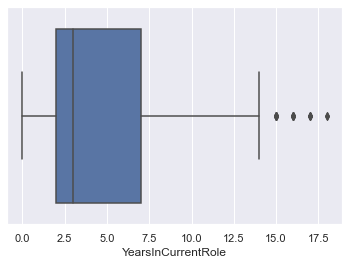

In [37]:
sns.boxplot('YearsInCurrentRole',data=df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='YearsAtCompany'>

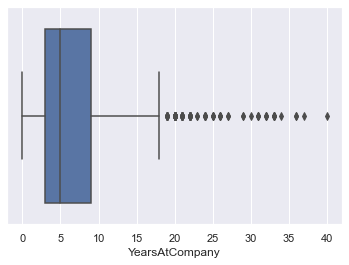

In [38]:
sns.boxplot('YearsAtCompany',data=df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TrainingTimesLastYear'>

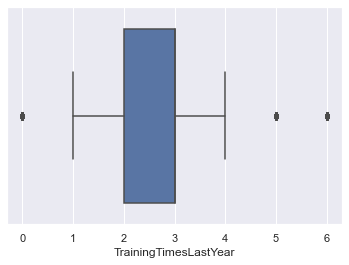

In [39]:
sns.boxplot('TrainingTimesLastYear',data=df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TotalWorkingYears'>

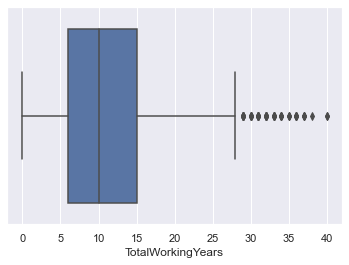

In [40]:
sns.boxplot('TotalWorkingYears',data=df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='StockOptionLevel'>

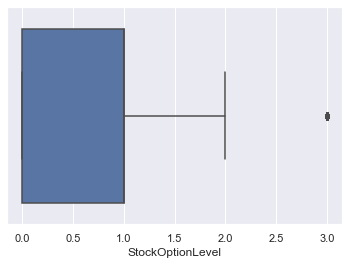

In [41]:
sns.boxplot('StockOptionLevel',data=df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PerformanceRating'>

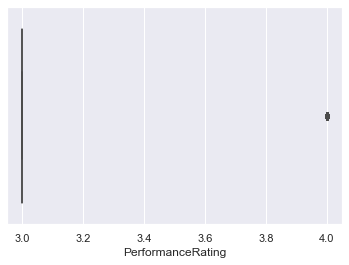

In [42]:
sns.boxplot('PerformanceRating',data=df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='NumCompaniesWorked'>

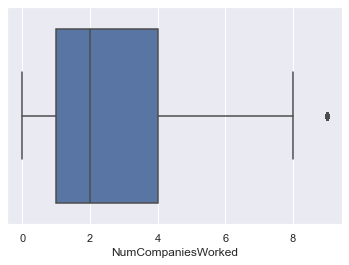

In [43]:
sns.boxplot('NumCompaniesWorked',data=df)

WE will check corelation of ech column and will then deal with outliers accordingly.

We will drop the column of standerad hours and Employee count.

In [44]:
df.drop(labels = ["StandardHours", "EmployeeCount"], axis = 1, inplace = True)

In [45]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,7,1,...,3,4,1,6,3,3,2,2,2,2


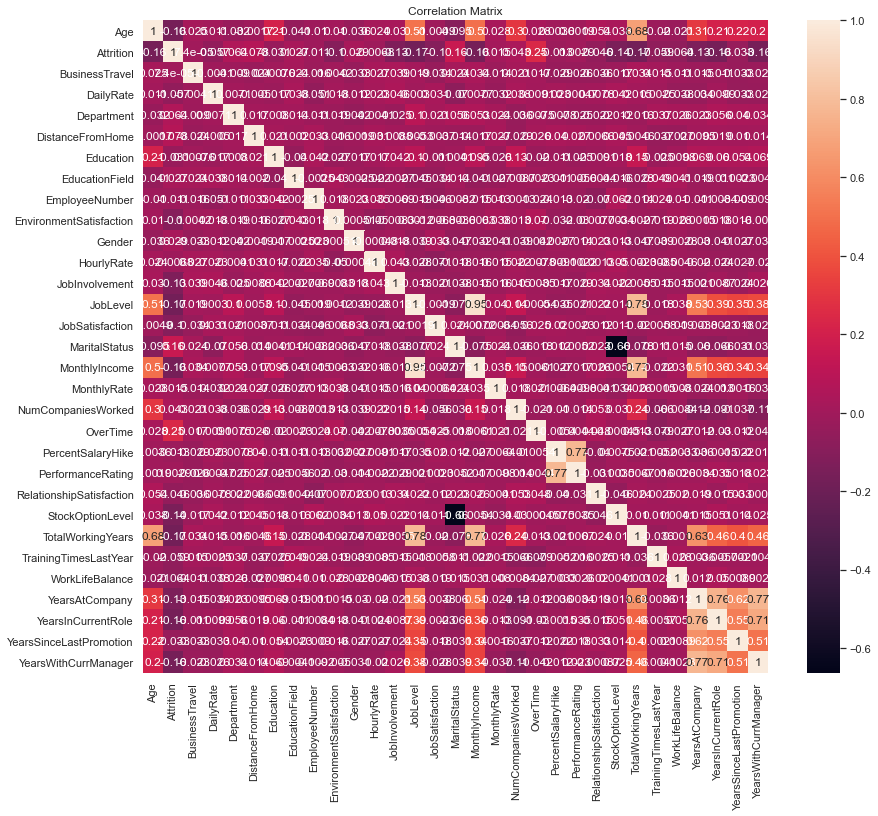

In [46]:
corr_mat=df.corr()
plt.figure(figsize=[14,12])
sns.heatmap(corr_mat,annot=True)
plt.title('Correlation Matrix')
plt.show()

We can see that all the columns have significant relatioship between the columns.

Overtime and marital status are having influence on the Attrition 


We will first treat the outliers using Zscore method

In [47]:
from scipy.stats import zscore

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int32 
 2   BusinessTravel            1470 non-null   int32 
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   int32 
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   int32 
 8   EmployeeNumber            1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   int32 
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                 

In [49]:
df['Over18']=LE.fit_transform(df['Over18'])

In [50]:
df['JobRole']=LE.fit_transform(df['JobRole'])

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int32
 2   BusinessTravel            1470 non-null   int32
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int32
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int32
 8   EmployeeNumber            1470 non-null   int64
 9   EnvironmentSatisfaction   1470 non-null   int64
 10  Gender                    1470 non-null   int32
 11  HourlyRate                1470 non-null   int64
 12  JobInvolvement            1470 non-null   int64
 13  JobLevel                  1470 non-null   int64
 14  JobRole                   1470 non-null 

In [52]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:2500: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


array([[0.4463504 , 2.28090588, 0.59004834, ..., 0.0632959 , 0.67914568,
        0.24583399],
       [1.32236521, 0.4384223 , 0.91319439, ..., 0.76499762, 0.36871529,
        0.80654148],
       [0.008343  , 2.28090588, 0.59004834, ..., 1.16768726, 0.67914568,
        1.15593471],
       ...,
       [1.08667552, 0.4384223 , 0.59004834, ..., 0.61549158, 0.67914568,
        0.31487349],
       [1.32236521, 0.4384223 , 0.91319439, ..., 0.48889978, 0.67914568,
        1.08689522],
       [0.32016256, 0.4384223 , 0.59004834, ..., 0.33939374, 0.36871529,
        0.59522723]])

In [53]:
df.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
Over18                      0.000000
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
T

Attrition, DistanceFromHome, OverTime, PercentSalaryHike, MonthlyIncome, PerformanceRating, StockOptionLevel,TotalWorkingYears, YearsAtCompany, YearsInCurrentRole,
YearsSinceLastPromotion, YearsWithCurrManage are having the high skewness. 
Skewness +/-0.65 is acceptable.
We will check the skewness graphically now 

Age
0.41286446154785084


<Figure size 432x288 with 0 Axes>

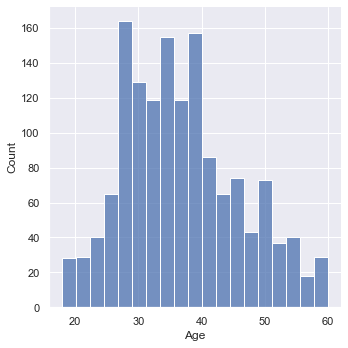

Attrition
1.842483584049465


<Figure size 432x288 with 0 Axes>

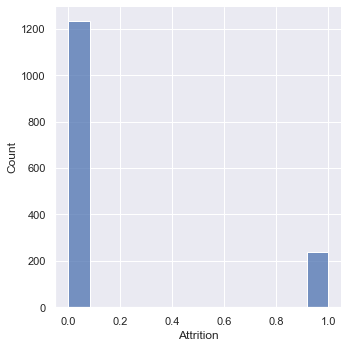

BusinessTravel
-1.4375371829186814


<Figure size 432x288 with 0 Axes>

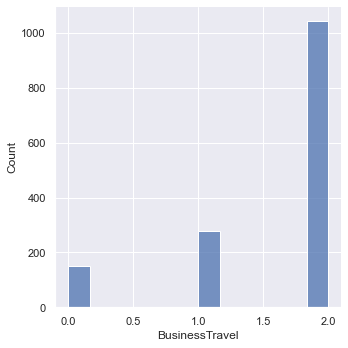

DailyRate
-0.003514976958291024


<Figure size 432x288 with 0 Axes>

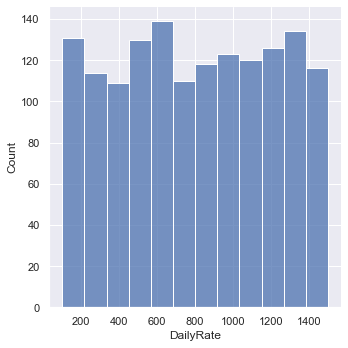

Department
0.17205501555446084


<Figure size 432x288 with 0 Axes>

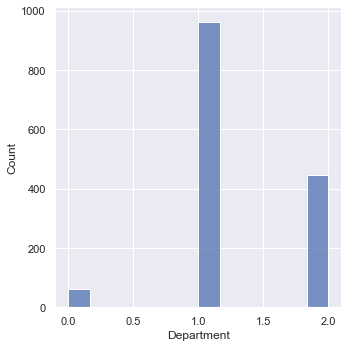

DistanceFromHome
0.9571400469829039


<Figure size 432x288 with 0 Axes>

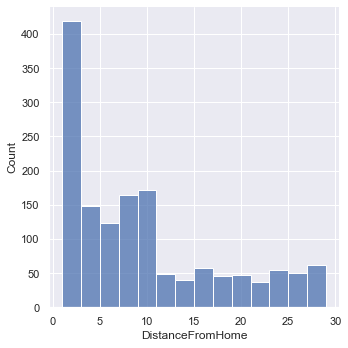

Education
-0.2893854052028825


<Figure size 432x288 with 0 Axes>

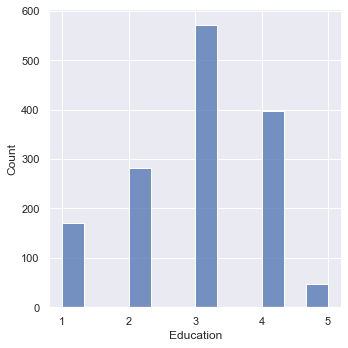

EducationField
0.5498094865361756


<Figure size 432x288 with 0 Axes>

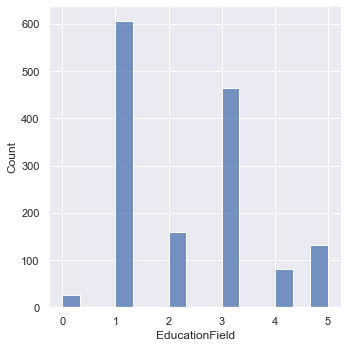

EmployeeNumber
0.01655710251921753


<Figure size 432x288 with 0 Axes>

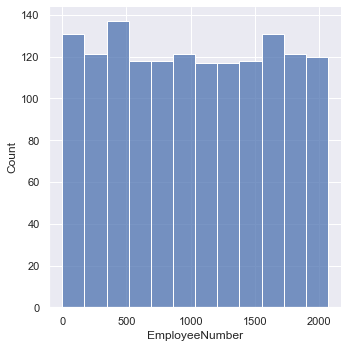

EnvironmentSatisfaction
-0.3213261358382832


<Figure size 432x288 with 0 Axes>

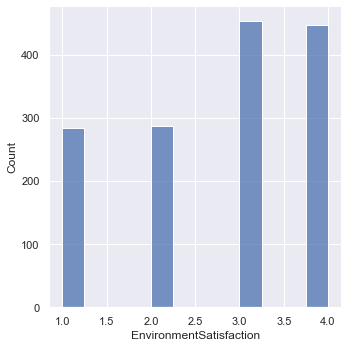

Gender
-0.4082482904638628


<Figure size 432x288 with 0 Axes>

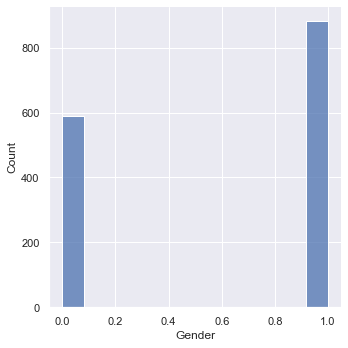

HourlyRate
-0.03227797319055416


<Figure size 432x288 with 0 Axes>

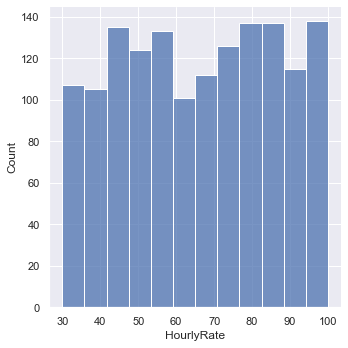

JobInvolvement
-0.4979106286269671


<Figure size 432x288 with 0 Axes>

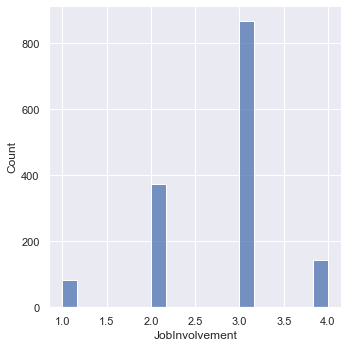

JobLevel
1.0243546583925869


<Figure size 432x288 with 0 Axes>

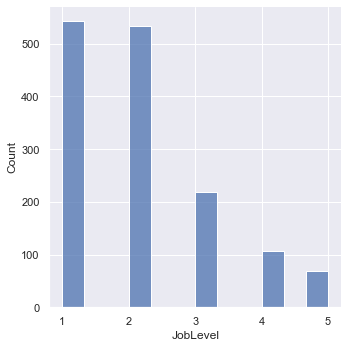

JobRole
-0.3569052550383217


<Figure size 432x288 with 0 Axes>

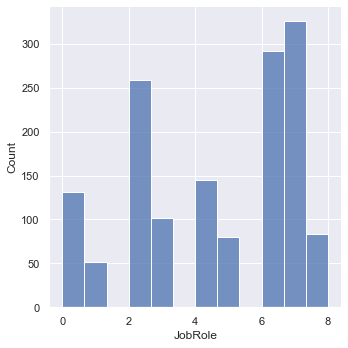

JobSatisfaction
-0.3293354633089524


<Figure size 432x288 with 0 Axes>

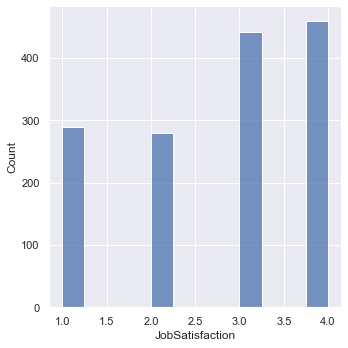

MaritalStatus
-0.15201929651271306


<Figure size 432x288 with 0 Axes>

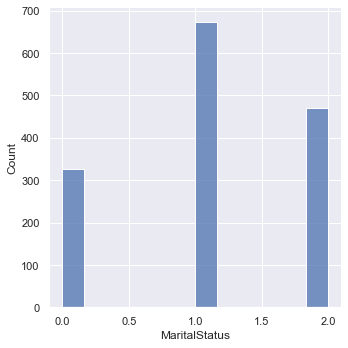

MonthlyIncome
1.3684185123330814


<Figure size 432x288 with 0 Axes>

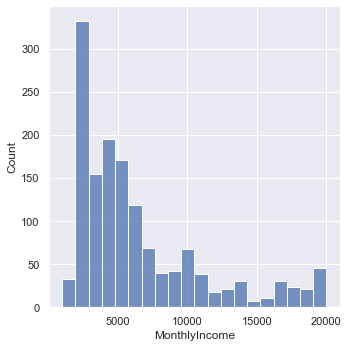

MonthlyRate
0.01855884556846042


<Figure size 432x288 with 0 Axes>

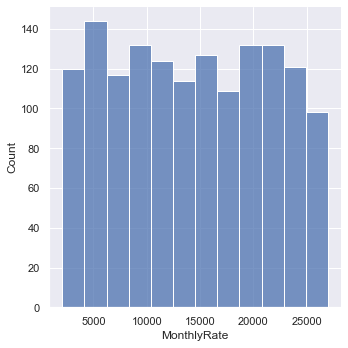

NumCompaniesWorked
1.0254233954371303


<Figure size 432x288 with 0 Axes>

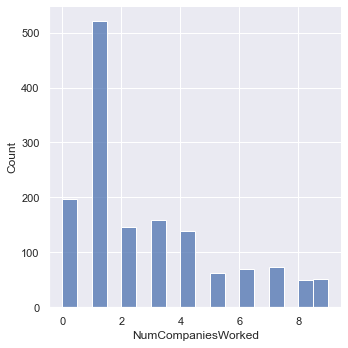

Over18
0.0


<Figure size 432x288 with 0 Axes>

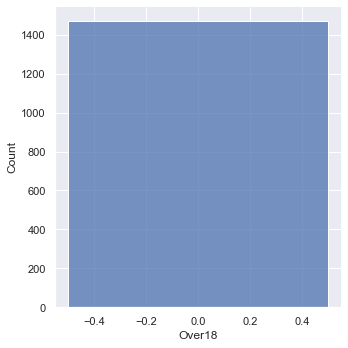

OverTime
0.963504412638946


<Figure size 432x288 with 0 Axes>

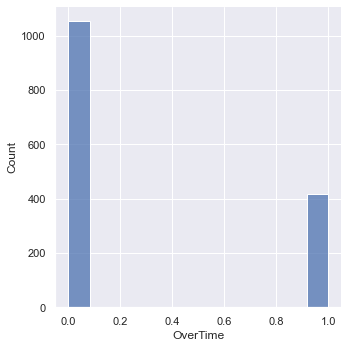

PercentSalaryHike
0.8202898522796266


<Figure size 432x288 with 0 Axes>

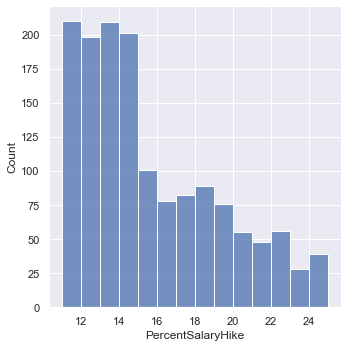

PerformanceRating
1.9199210412109473


<Figure size 432x288 with 0 Axes>

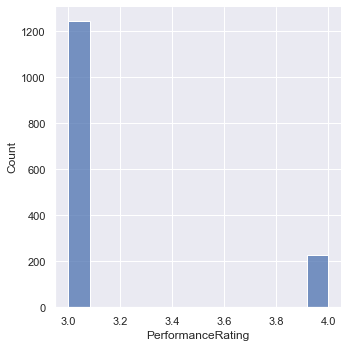

RelationshipSatisfaction
-0.3025184698222079


<Figure size 432x288 with 0 Axes>

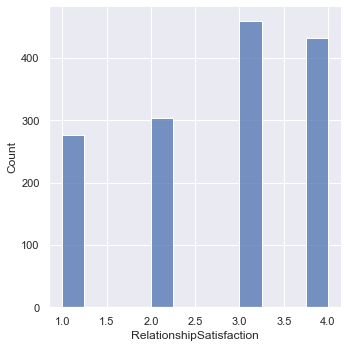

StockOptionLevel
0.9679912809556104


<Figure size 432x288 with 0 Axes>

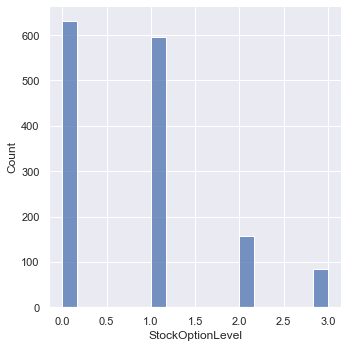

TotalWorkingYears
1.11603155825941


<Figure size 432x288 with 0 Axes>

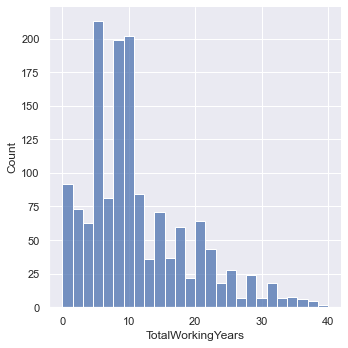

TrainingTimesLastYear
0.5525595985771926


<Figure size 432x288 with 0 Axes>

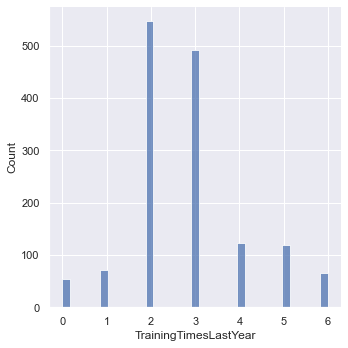

WorkLifeBalance
-0.5519163838185224


<Figure size 432x288 with 0 Axes>

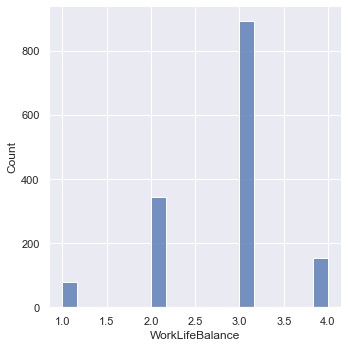

YearsAtCompany
1.7627284034822992


<Figure size 432x288 with 0 Axes>

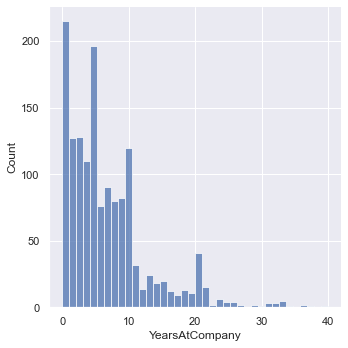

YearsInCurrentRole
0.9164268059808774


<Figure size 432x288 with 0 Axes>

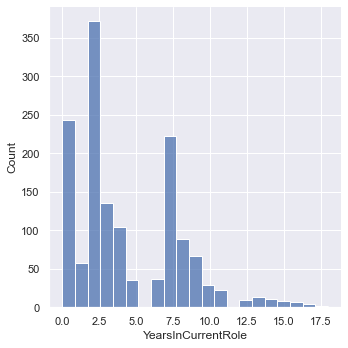

YearsSinceLastPromotion
1.982264623462895


<Figure size 432x288 with 0 Axes>

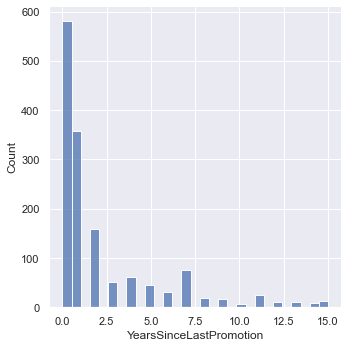

YearsWithCurrManager
0.8326002906209379


<Figure size 432x288 with 0 Axes>

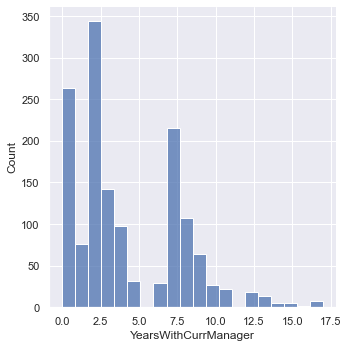

In [54]:
from scipy.stats import skew
for col in df:
    print (col)
    print(skew (df[col]))
    
    plt.figure()
    sns.displot(df[col])
    plt.show()

We will not treat the negative values as log any negative values will result in Nan values.
We will use log transformation to treat skewness.

Attrition, DistanceFromHome, OverTime, PercentSalaryHike, MonthlyIncome, PerformanceRating, StockOptionLevel,TotalWorkingYears, YearsAtCompany, YearsInCurrentRole,
YearsSinceLastPromotion, YearsWithCurrManage are having the high skewness. 

In [55]:
df["Attrition"] = np.sqrt(df["Attrition"])
skew(df['Attrition'])

1.842483584049465

In [56]:
df["DistanceFromHome"] = np.sqrt(df["DistanceFromHome"])
skew(df['DistanceFromHome'])

0.3977080243406974

In [57]:
df["OverTime"] = np.sqrt(df["OverTime"])
skew(df['OverTime'])

0.963504412638946

In [58]:
df["PercentSalaryHike"] = np.sqrt(df["PercentSalaryHike"])
skew(df['PercentSalaryHike'])

0.6547426150827689

In [59]:
df["MonthlyIncome"] = np.sqrt(df["MonthlyIncome"])
skew(df['MonthlyIncome'])

0.8610798186762297

In [60]:
df["PerformanceRating"] = np.sqrt(df["PerformanceRating"])
skew(df['PerformanceRating'])

1.9199210412109415

In [61]:
df["TotalWorkingYears"] = np.sqrt(df["TotalWorkingYears"])
skew(df['TotalWorkingYears'])

0.1761783193490487

In [62]:
df["YearsSinceLastPromotion"] = np.sqrt(df["YearsSinceLastPromotion"])
skew(df['YearsSinceLastPromotion'])

0.7383711452044008

In [63]:
df["YearsWithCurrManager"] = np.sqrt(df["YearsWithCurrManager"])
skew(df['YearsWithCurrManager'])

-0.2543509487255476

In [64]:
df["YearsInCurrentRole"] = np.sqrt(df["YearsInCurrentRole"])
skew(df['YearsInCurrentRole'])

-0.2540840810303231

In [65]:
df["YearsAtCompany"] = np.sqrt(df["YearsAtCompany"])
skew(df['YearsAtCompany'])

0.42639886451266445

In [66]:
df.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.398114
Education                  -0.289681
EducationField              0.550371
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               0.861960
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
Over18                      0.000000
OverTime                    0.964489
PercentSalaryHike           0.655412
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           0.176358
T

We have tried to reduce the skewness

# Model

This an example of classification hence we will try to use3 classification model to predict.

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
y = df['Attrition']
x = df.drop('Attrition', axis = 1)

In [69]:
x.shape

(1470, 32)

In [70]:
y.shape

(1470,)

In [71]:
x.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1102,2,1.000000,2,1,1,2,0,...,1.732051,1,0,2.828427,0,1,2.449490,2.000000,0.000000,2.236068
1,49,1,279,1,2.828427,1,1,2,3,1,...,2.000000,4,1,3.162278,3,3,3.162278,2.645751,1.000000,2.645751
2,37,2,1373,1,1.414214,2,4,4,4,1,...,1.732051,2,0,2.645751,3,3,0.000000,0.000000,0.000000,0.000000
3,33,1,1392,1,1.732051,4,1,5,4,0,...,1.732051,3,0,2.828427,3,3,2.828427,2.645751,1.732051,0.000000
4,27,2,591,1,1.414214,1,3,7,1,1,...,1.732051,4,1,2.449490,3,3,1.414214,1.414214,1.414214,1.414214


In [72]:
y.head()

0    1.0
1    0.0
2    1.0
3    0.0
4    0.0
Name: Attrition, dtype: float64

In [73]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

We are spliting the test and train data in ratio of 20:80

In [74]:
print (x_train.shape, x_test.shape)
print (y_train.shape, y_test.shape)

(1176, 32) (294, 32)
(1176,) (294,)


In [75]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

Logestic Regressor

In [76]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()        
lg

LogisticRegression()

In [77]:
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print(pred)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.
 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]


In [78]:
y_pred = lg.predict(x_test)

In [79]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))                  # Logistic regression
print(classification_report(y_test,pred))

0.8843537414965986
[[244   9]
 [ 25  16]]
              precision    recall  f1-score   support

         0.0       0.91      0.96      0.93       253
         1.0       0.64      0.39      0.48        41

    accuracy                           0.88       294
   macro avg       0.77      0.68      0.71       294
weighted avg       0.87      0.88      0.87       294



In [80]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)                                       #Decision tree classifier
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

0.782312925170068
[[217  36]
 [ 28  13]]
              precision    recall  f1-score   support

         0.0       0.89      0.86      0.87       253
         1.0       0.27      0.32      0.29        41

    accuracy                           0.78       294
   macro avg       0.58      0.59      0.58       294
weighted avg       0.80      0.78      0.79       294



In [81]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
rf.fit(x_train, y_train)
predrf=rf.predict(x_test)                       # Random forest classifier
print (accuracy_score(y_test,predrf))
print (confusion_matrix(y_test,predrf))
print (classification_report(y_test,predrf))

0.8775510204081632
[[251   2]
 [ 34   7]]
              precision    recall  f1-score   support

         0.0       0.88      0.99      0.93       253
         1.0       0.78      0.17      0.28        41

    accuracy                           0.88       294
   macro avg       0.83      0.58      0.61       294
weighted avg       0.87      0.88      0.84       294



In [82]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(lg, x,y, cv=5)
print("Cross Validation score of LogisticRegression model :",scr.mean())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Cross Validation score of LogisticRegression model : 0.8401360544217686


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [83]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(dt, x,y, cv=5)
print("Cross Validation score of DecisionTree model :",scr.mean())

Cross Validation score of DecisionTree model : 0.7789115646258502


In [84]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(rf, x,y, cv=5)
print("Cross Validation score of RandomForest model :",scr.mean())

Cross Validation score of RandomForest model : 0.858503401360544


	     Accuracy Score  -	Cross Validation Score =	Difference
			
Logistic Regression	        83.333     -      84.013                    = 0.683

DecissionTree Classifier	77.891     -      77.482                    = 0.409

RandomForest Classifier	    82.312     -      85.918                    = 3.606
			

Hence we conclude that DecissionTree classifier is the best model for prediction.

GridsearchCV Hyper parameter tunning


In [85]:
from sklearn.model_selection import GridSearchCV
parameters={'max_depth': np.arange(2,15),
           'criterion':['gini','entropy']}


In [86]:
GCV=GridSearchCV(DecisionTreeClassifier(),parameters,cv=5)

In [87]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [88]:
GCV.best_params_

{'criterion': 'entropy', 'max_depth': 3}

In [89]:
GCV_pred=GCV.best_estimator_.predict(x_test)

In [90]:
accuracy_score(y_test,GCV_pred)

0.8707482993197279

In [91]:
import joblib
joblib.dump(GCV.best_estimator_,"HR_AanalyticsDTC.pkl")

['HR_AanalyticsDTC.pkl']